# Projet maths-info 2

##### Par Narjis El Amraoui et Rania Fathi

### Question n°1

##### Implémentation

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, exp

# On implémente la méthode d'Euler explicite

def solve_euler_explicit(f, x0, dt, t0, tf):
    liste_x = [x0]
    temps = [t0]
    while temps[-1] < tf: 
        liste_x.append(liste_x[-1] + dt * f(liste_x[-1],temps[-1]))
        temps.append(temps[-1] + dt)
    #On veut récupérer x[0] qui correspond à la solution de l'équation différentielle d'ordre > 1
    liste_x_0 = [el[0] for el in liste_x] 
    return temps, liste_x, liste_x_0
        



Le tracé des courbes est fait dans la question 2, où les performances de la méthode d'Euler explicite sont directement comparées à celles du schéma d'odre 2. 

### Question n°2

In [90]:
# On implémente la méthode d'ordre 2

def solve_runge_kutta_2(f, x0, dt, t0, tf):
    liste_x = [x0]
    temps = [t0]
    while temps[-1] < tf: 
        liste_x.append(liste_x[-1] + dt * f(liste_x[-1] + dt/2 *f(liste_x[-1],temps[-1]), temps[-1]+dt/2))
        temps.append(temps[-1] + dt)
    liste_x_0 = [el[0] for el in liste_x]
    return temps, liste_x, liste_x_0

Comme on peut le voir dans l'exemple qui suit, qu'il s'agisse d'une méthode d'ordre 1 ou 2, les courbes sont confondues et ne sont pas superposées à celle de la solution réelle. On implémente donc un ordre supérieur (Runge-Kutta d'ordre 4) pour voir s'il y a une différence notable sur l'exemple étudié. 

In [91]:
def solve_runge_kutta_4(f, x0, dt, t0, tf):
    liste_x = [x0]
    temps = [t0]
    while temps[-1] < tf: 
        F_1 = f(liste_x[-1], temps[-1])
        F_2 = f(liste_x[-1]+dt/2*F_1, temps[-1] + dt/2)
        F_3 = f(liste_x[-1]+dt/2*F_2, temps[-1] + dt/2)
        F_4 = f(liste_x[-1]+dt*F_3, temps[-1]+dt)
        liste_x.append(liste_x[-1] + dt * (F_1 + 2*F_2 + 2*F_3 + F_4)/6)
        temps.append(temps[-1] + dt)
    liste_x_0 = [el[0] for el in liste_x]
    return temps, liste_x, liste_x_0


##### Comparaison

On effectue trois tests:
- Une sur la solution de l'EDL2  x" + 4x' + 3x = 0, en notant X = (x, x'), on a X'= F(t,X)= [[0,1],[-3,-4]]*X. Mais cette solution convergeant trop rapidement vers 0, on différencie difficilement l'efficacité de la convergence des trois méthodes. 
- On teste alors sur des fonctions périodiques (cos(t)) pour voir si un écart se crée pour t assez grand, ou des fonctions qui divergent rapidement (exp(t)).



In [92]:
def f0(x,t):
    return np.dot(np.array([[0,1],[-3,-4]]),np.array(x))
x_0 = np.array([2,0])
    
# Solution exacte
def x0(t):
     return -1*np.exp(-3*t)+3* np.exp(-t)

In [93]:
def f1(x,t):
    return np.dot(np.array([[0,1],[-1,0]]), np.array(x)) 
x_1 = np.array([1,0])

#Solution exacte
def x1(t):
    return cos(t)

In [94]:
def f2(x,t):
    return np.dot(np.array([[0,1],[2,-1]]), np.array(x)) 
x_2 = np.array([1,1])

#Solution exacte
def x2(t):
    return np.exp(t)

On trace aussi les erreurs (simple différence) des 3 méthodes pour ne pas seulement se fier à la superposition des solutions que l'on peut voir à l'oeil nu, on voit alors que l'erreur obtenue avec les méthodes de Runge-Kutta d'ordre 2, et a fortiori d'ordre 4, sont négligeables devant l'erreur obtenue avec le schéma d'Euler explicite.

###### Fonction 1

<IPython.core.display.Javascript object>


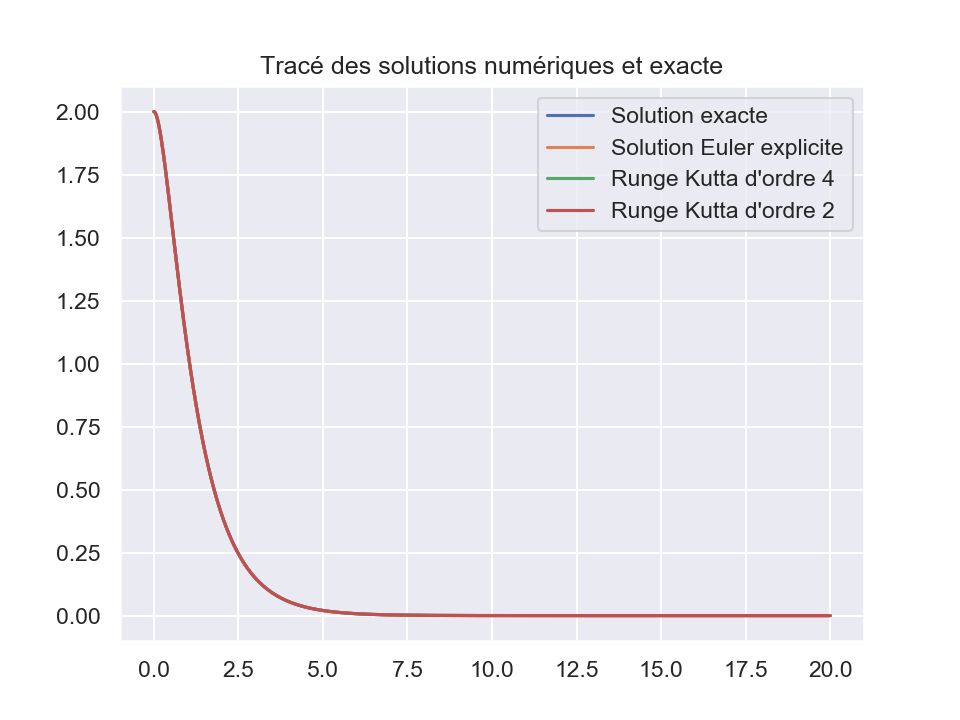

<IPython.core.display.Javascript object>


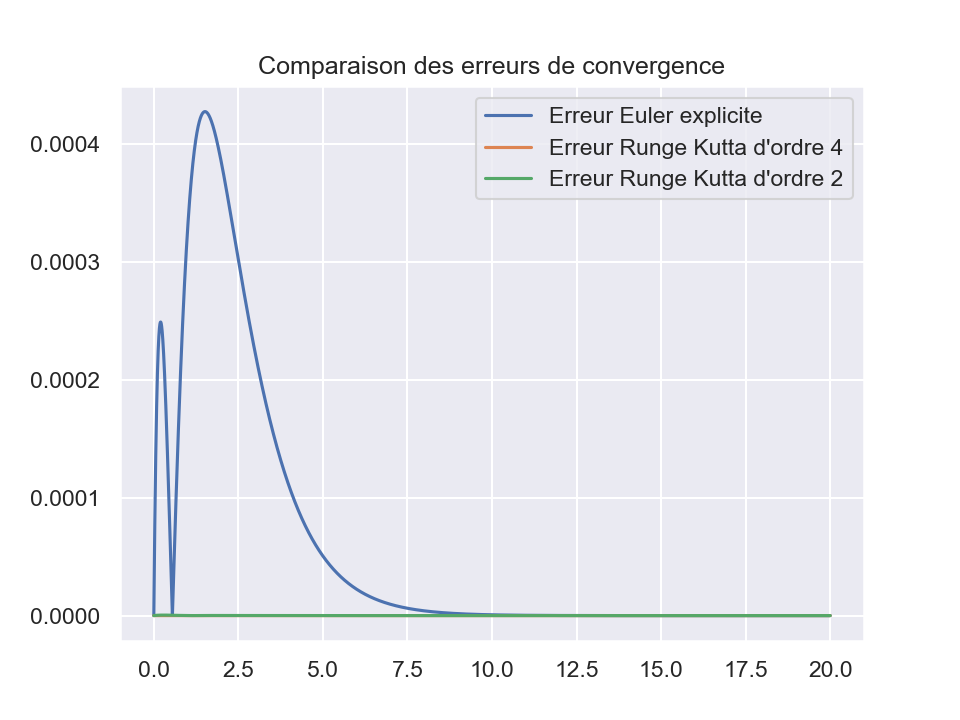

In [95]:

# On compare les 4 courbes: les 3 méthodes et la solution exacte

dt =10**-3 # c'est le pas, qu'on peut donc facilement faire varier pour en observer l'influence
T0 = np.arange(0, 20.+dt, dt)
X0 = [x0(t) for t in T0]


A = solve_euler_explicit(f0, x_0, dt, 0, 20)
B = solve_runge_kutta_2(f0, x_0, dt, 0, 20)
C = solve_runge_kutta_4(f0, x_0, dt, 0, 20)

erreur_euler_explicite = [abs(a-b) for a,b in zip(A[2],X0)]
erreur_runge_kutta_2 = [abs(a-b) for a,b in zip(B[2],X0)]
erreur_runge_kutta_4 = [abs(a-b) for a,b in zip(C[2],X0)]

plt.figure()
plt.title("Tracé des solutions numériques et exacte")
plt.plot(T0, X0, label = "Solution exacte")
plt.plot(A[0], A[2], label = "Solution Euler explicite")
plt.plot(C[0],C[2], label = "Runge Kutta d'ordre 4")
plt.plot(B[0], B[2], label = "Runge Kutta d'ordre 2")
plt.legend()
plt.show()

plt.figure()
plt.title("Comparaison des erreurs de convergence")
plt.plot(A[0], erreur_euler_explicite, label = "Erreur Euler explicite")
plt.plot(C[0], erreur_runge_kutta_4, label = "Erreur Runge Kutta d'ordre 4")
plt.plot(B[0], erreur_runge_kutta_2, label = "Erreur Runge Kutta d'ordre 2")
plt.legend()
plt.show()

###### Fonction 2

<IPython.core.display.Javascript object>


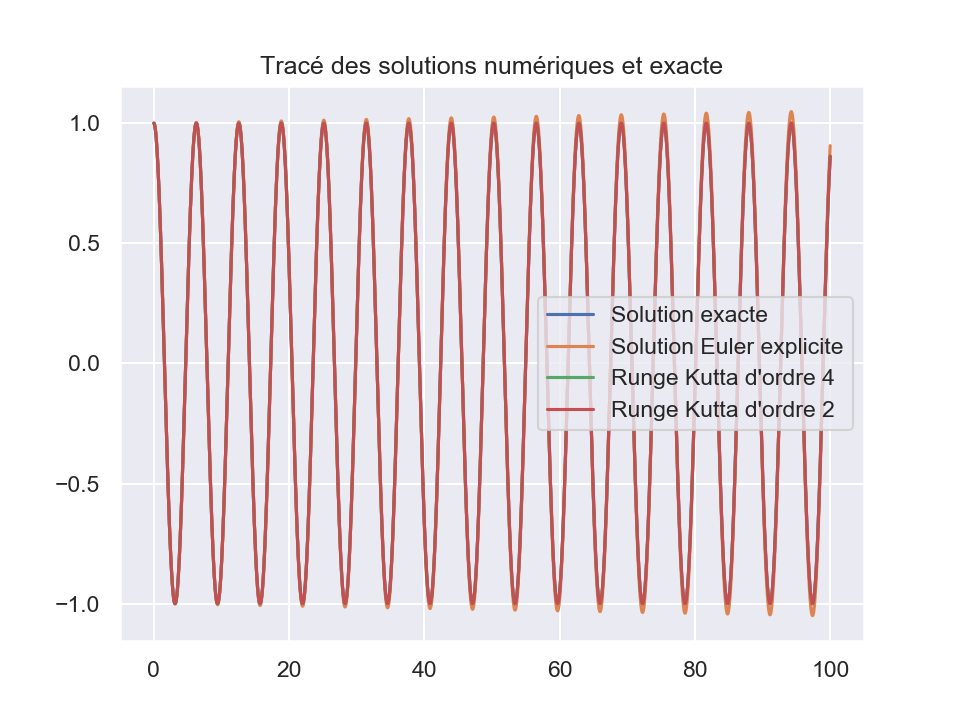

<IPython.core.display.Javascript object>


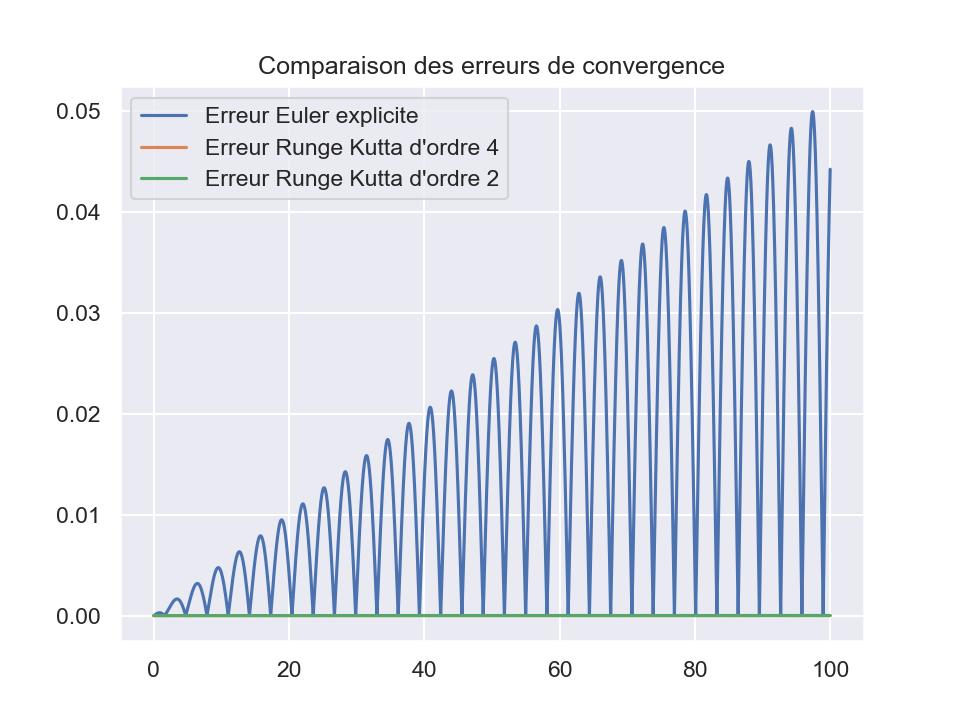

In [96]:
T1 = np.arange(0, 100.+dt, dt)
X1 = [x1(t) for t in T1]


A = solve_euler_explicit(f1, x_1, dt, 0, 100)
B = solve_runge_kutta_2(f1, x_1, dt, 0, 100)
C = solve_runge_kutta_4(f1, x_1, dt, 0, 100)

erreur_euler_explicite = [abs(a-b) for a,b in zip(A[2],X1)]
erreur_runge_kutta_2 = [abs(a-b) for a,b in zip(B[2],X1)]
erreur_runge_kutta_4 = [abs(a-b) for a,b in zip(C[2],X1)]

plt.figure()
plt.title("Tracé des solutions numériques et exacte")
plt.plot(T1, X1, label = "Solution exacte")
plt.plot(A[0], A[2], label = "Solution Euler explicite")
plt.plot(C[0],C[2], label = "Runge Kutta d'ordre 4")
plt.plot(B[0], B[2], label = "Runge Kutta d'ordre 2")
plt.legend()
plt.show()

plt.figure()
plt.title("Comparaison des erreurs de convergence")
plt.plot(A[0], erreur_euler_explicite, label = "Erreur Euler explicite")
plt.plot(C[0], erreur_runge_kutta_4, label = "Erreur Runge Kutta d'ordre 4")
plt.plot(B[0], erreur_runge_kutta_2, label = "Erreur Runge Kutta d'ordre 2")
plt.legend()
plt.show()




###### Fonction 3

<IPython.core.display.Javascript object>


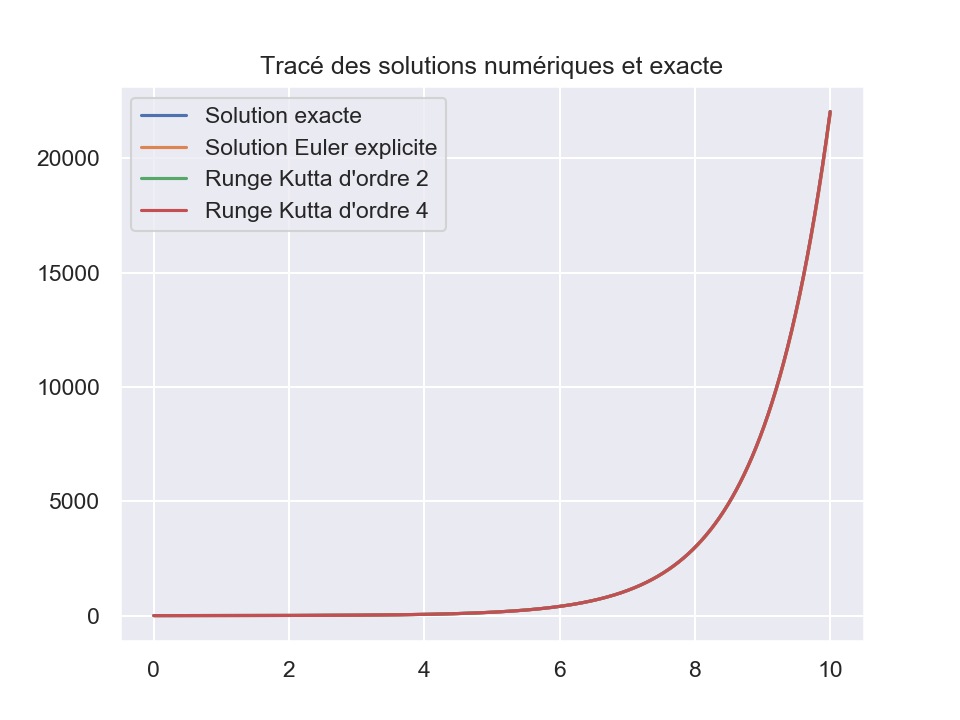

<IPython.core.display.Javascript object>


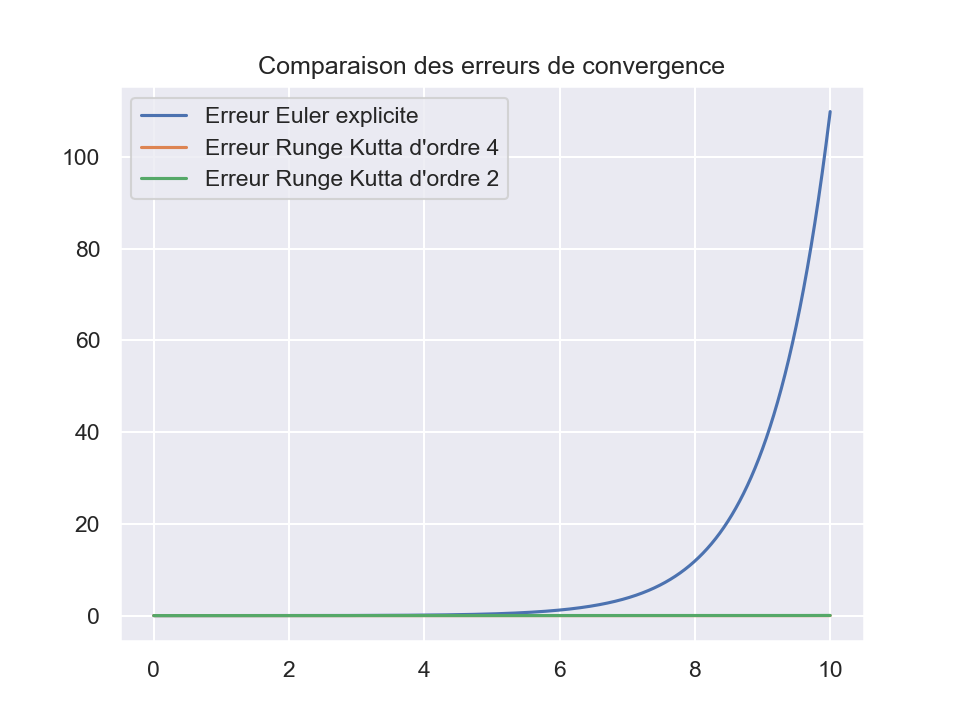

In [97]:
T2 = np.arange(0, 10.001+dt, dt)
X2 = [x2(t) for t in T2]

tf = 10
t0 = 0
A = solve_euler_explicit(f2, x_2, dt, t0, tf)
B = solve_runge_kutta_2(f2, x_2, dt, t0, tf)
C = solve_runge_kutta_4(f2, x_2, dt, t0, tf)

erreur_euler_explicite = [abs(a-b) for a,b in zip(A[2],X2)]
erreur_runge_kutta_4 = [abs(a-b) for a,b in zip(C[2],X2)]
erreur_runge_kutta_2 = [abs(a-b) for a,b in zip(B[2],X2)]

plt.figure()
plt.title("Tracé des solutions numériques et exacte")
plt.plot(T2, X2, label = "Solution exacte")
plt.plot(A[0], A[2], label = "Solution Euler explicite")
plt.plot(B[0], B[2], label = "Runge Kutta d'ordre 2")
plt.plot(C[0],C[2], label = "Runge Kutta d'ordre 4")
plt.legend()
plt.show()

plt.figure()
plt.title("Comparaison des erreurs de convergence")
plt.plot(A[0], erreur_euler_explicite, label = "Erreur Euler explicite")
plt.plot(C[0], erreur_runge_kutta_4, label = "Erreur Runge Kutta d'ordre 4")
plt.plot(B[0], erreur_runge_kutta_2, label = "Erreur Runge Kutta d'ordre 2")
plt.legend()
plt.show()


On observe donc qu'on obtient une meilleure convergence pour un schéma d'ordre 2.

### Question n°3

In [98]:
from IPython.display import display
from IPython.display import Latex, Math


On sait que:

\begin{align}
x(t_{j+1}) = x(t_{j}) + \int_{t_{j}}^{t_{j+1}} {f(s,x(s)) ds}
\end{align}



Comme la fonction f est C1, x est C2 et on a: 


\begin{align}
x(t_{j+1}) = x(t_{j}) + \triangle t_{j} \times f(t_{j}, x(t_{j})) + \frac{\Delta t_{j}^{2}}{2} x^{''}(t_{j}) + \Theta(\Delta t_{j}^{3})
\end{align}

Et le schéma explicite d'Euler donne: 

\begin{align}
x^{j+1} = x^{j} + \Delta t_{j} f(t_{j},x^{j}) 
\end{align}

Et comme: 

\begin{align}
 x(t_{j}) = x^{j} 
\end{align}

On a 

\begin{align}
 e^{j+1} = \frac{\Delta t_{j}^{2}}{2} x''(t_{j}) + \Theta(\Delta t_{j}^{3}) \\ \\
\end{align}

Et on remarque que: 

\begin{align}
f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) = f(t_{j} + \Delta t_{j}, x^{j} + \Delta t_{j} f(t_{j},x^{j})) - f(t_{j}, x^{j}) \\ \\
\end{align}

Ce que l'on peut réécrire à l'aide d'un développement limité à l'ordre 1, f étant C1: 

\begin{align}
f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) =   \Delta t_{j} \partial_{t} f (t_{j}, x(t_{j})) + \Delta t_{j} x'(t_{j}) \partial_{x} f (t_{j}, x(t_{j})) + \Theta(\Delta t_{j}^{2}) \\ \\
\end{align}

On reconnait la dérivée seconde de x: 

\begin{align}
f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) =  \Delta t_{j} x"(t_{j}) + \Theta(\Delta t_{j}^{2})  
\end{align}

On obtient alors: 

\begin{align}
e^{j+1} = \frac{\Delta t_{j}}{2}(f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}))  + \Theta(\Delta t_{j}^{3}) 
\end{align}

Par passage à la norme: 

\begin{align}
\|e^{j+1}\| = \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})) + \Theta(\Delta t_{j}^{3})\| 
\end{align}

Et par définition du O, on peut écrire: 

\begin{align}
\Theta(\Delta t_{j}^{3}) = g(\Delta t_{j})\Delta t_{j}^3 \;\;où\, g\, est\, bornée. \\ \\
\end{align}

L'inégalité triangulaire nous donne alors: 

\begin{align}
\|e^{j+1}\| \leq \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}))\| + \|g(\Delta t_{j})\Delta t_{j}^3\| 
\end{align}

\begin{align}
\|e^{j+1}\| - \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}))\| \leq \|g(\Delta t_{j})\Delta t_{j}^3\| 
\end{align}

\begin{align}
\|e^{j+1}\| - \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}))\| \leq \Delta t_{j}^3 h(\Delta t_{j}) \\
avec\, h(\Delta t_{j}) = \|g(\Delta t_{j})\|sgn(\Delta t_{j}^3) \;\; bornée. \\ \\
\end{align}

On obtient donc bien l'égalité suivante: 

\begin{align}
\|e^{j+1}\| = \frac{\Delta t_{j}}{2}\|f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})) \| + \Theta(\Delta t_{j}^{3})
\end{align}

De plus, comme on résout l'équation différentielle sur un compact [t0, tf], on peut majorer x'' car x est C2, et on obtient d'après les relations suivantes:

\begin{align}
 e^{j+1} = \frac{\Delta t_{j}^{2}}{2} x''(t_{j}) + \Theta(\Delta t_{j}^{3}) \\ \\
 x''(t_{j}) \leq A\, où\,  A \in \Re \\ \\
 e^{j+1} \leq A\frac{\Delta t_{j}^{2}}{2} + \Theta(\Delta t_{j}^{3}) \\ \\
\end{align}

D'où :

\begin{align}
e^{j+1} = \Theta(\Delta t_{j}^{2}) \\ \\
\end{align}

### Question n°4

On peut adopter la stratégie suivante, qui consiste à choisir :

\begin{align}
\Delta t_{new} = \Delta t_{j} \sqrt[]{\frac{T_{abs}}{e^{j+1}}}
\end{align}

Par "homogénéité", on sait que le nouveau pas de temps doit être proportionnel à l'ancien. 
De plus, on souhaite que l'erreur reste inférieure à la valeur imposée: 
* Lorsque l'erreur est trop grande, on réduit le pas de temps, 
* A l'inverse, lorsqu'elle est trop faible par rapport à la tolérance imposée, et qu'on risque une propagation d'erreurs d'arrondis trop importante, on augmente le pas de temps.  

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

In [100]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    """On calcule à des intervalles optimisés les valeurs de la solution pour assurer la convergence 
    en appliquant la méthode d'Euleur explicite, et, en appliquant la stratégie décrite plus haut: 
    on vérifie à chaque étape que l'erreur reste inférieure à la tolérance voulue, 
    on adapte le pas de temps à la valeur de l'erreur, mais on ne garde que les valeurs à chaque dtmax (souci de mémoire)"""
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next) # x_back sert à calculer l'erreur e_{j+1} 
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error) # On adapte le pas de temps en se gardant une marge de sécurité (0.9)
            # Puis on s'assure que le pas de temps reste toujours compris entre dtmin et dtmax:
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2 
            t, ti, x = t_next, ti_next, x_next
        # Quand ti atteint dtmax, on y revient avec dt2D qui est négatif
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        # On ne conserve que les dernières valeurs calculées
        ts = vstack([ts,t_next])  
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

On compare maintenant cette méthode à Euler explicite et Runge Kutta 2 sur l'un des derniers exemples.

<IPython.core.display.Javascript object>


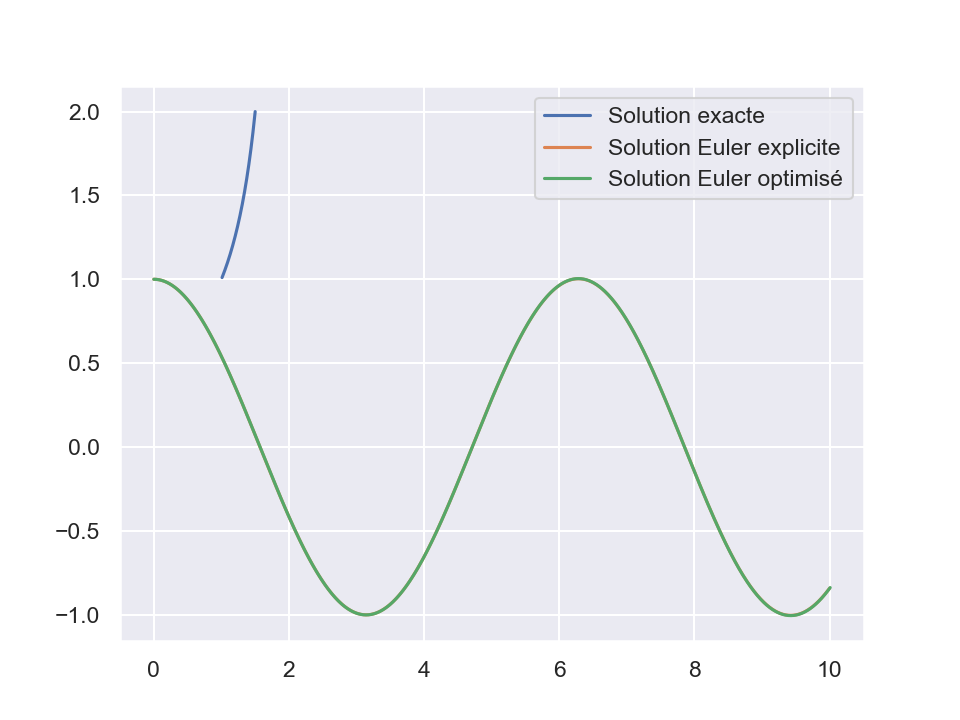

<IPython.core.display.Javascript object>


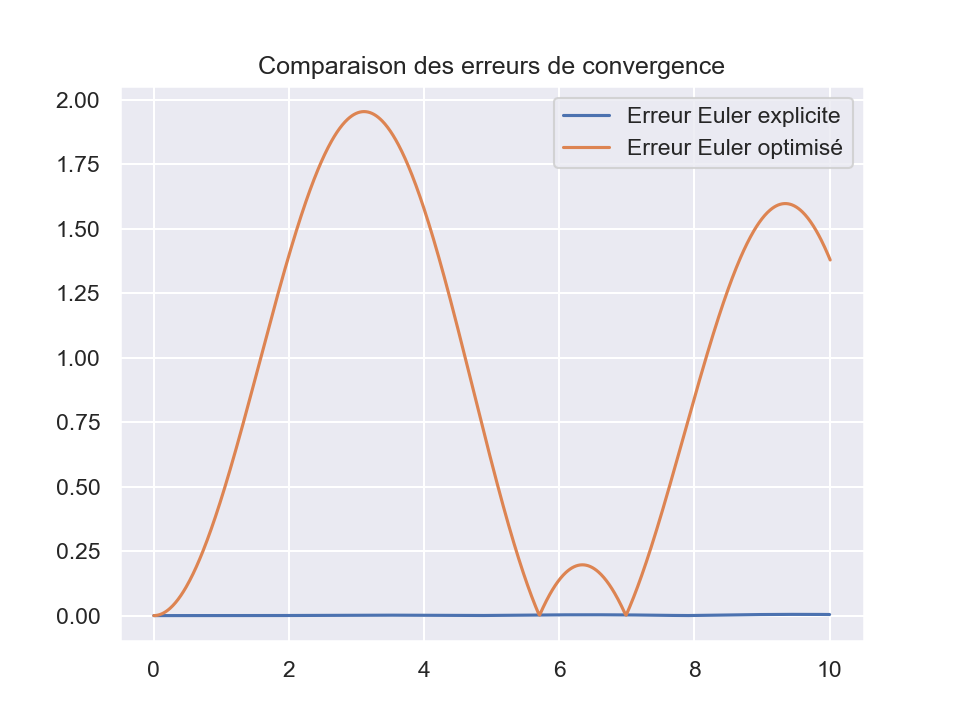

In [105]:
def solve_euler_explicit_bis(f, x0, dt, t0, tf):
    liste_x = [x0]
    temps = [t0]
    while temps[-1] < tf: 
        liste_x.append(liste_x[-1] + dt * f(liste_x[-1]))
        temps.append(temps[-1] + dt)
    #On veut récupérer x[0] qui correspond à la solution de l'équation différentielle d'ordre > 1
    liste_x_0 = [el[0] for el in liste_x] 
    return temps, liste_x, liste_x_0
        

T1 = np.arange(0, 100.+dt, dt)
X1 = [x1(t) for t in T1]
                       
def f1(x):
    return np.dot(np.array([[0,1],[-1,0]]), np.array(x)) 
                       
x_1 = np.array([1,0])


t0, tf = 0, 10

A = solve_euler_explicit_bis(f1, x_1, dt, t0, tf)
B = solve_ivp_euler_explicit_variable_step(f1, t0, x_1, tf)

erreur_euler_explicite = [abs(a-b) for a,b in zip(A[2],X1)]
erreur_ivp_euler_explicite = [abs(a-b) for a,b in zip(B[1][0],X1)]



plt.figure()
plt.plot(T3, X3, label = "Solution exacte")
plt.plot(A[0], A[2],  label = "Solution Euler explicite")
plt.plot(B[0], B[1][0],  label = "Solution Euler optimisé")
plt.legend()
plt.show()

plt.figure()
plt.title("Comparaison des erreurs de convergence")
plt.plot(A[0], erreur_euler_explicite, label = "Erreur Euler explicite")
plt.plot(B[0], erreur_ivp_euler_explicite, label = "Erreur Euler optimisé")
plt.legend()
plt.show()



